# Missing Contacts
You might find that some contacts that you were **expecting** to be found by ``mdciao`` don't actually show up in ``mdciao``'s results. Several input parameters control the contact reporting of ``mdciao``, and it might not be obvious which one of them (if any) is actually *hiding* your contact. The logic behind these parameters, and their default values, is fairly straightforward, and we illustrate it here.


If you want to run this notebook on your own, please download and extract the data from [here](http://proteinformatics.org/mdciao/mdciao_example.zip) first. You can download it:

* using the browser 
* using the terminal with  
 ```wget http://proteinformatics.org/mdciao/mdciao_example.zip; unzip mdciao_example.zip```
* using  mdciao's own method [mdciao.examples.fetch_example_data](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.examples.fetch_example_data.html?highlight=fetch)

If you want to take a 3D-look at this data, you can do it [here](http://proteinformatics.uni-leipzig.de/mdsrv.html?load=file://base/mdciao/gs-b2ar.ngl).

## `ctc_cutoff_Ang`
This is the most obvious parameter that controls the contact computation. It appears virtually in all methods (CLI or API) that compute contact frequencies. Whenever it has a default value, it is **4.5 Angstrom**.

<div class="alert alert-info">
    
<b>Note</b> 
    
Please see the *note of caution* on the use of hard cutoffs in the [main page of the docs](https://proteinformatics.uni-leipzig.de/mdciao/index.html).

</div>

In [1]:
import mdciao, os
if not os.path.exists("mdciao_example"):
    mdciao.examples.fetch_example_data()

In [2]:
import mdtraj as md
traj = md.load("mdciao_example/traj.xtc",top="mdciao_example/top.pdb")

First, we individually call [mdciao.cli.residue_neighborhoods](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.residue_neighborhoods.html) with two ``ctc_cutoff_Ang`` values, 3.0, 3.5, and 4.0 Angstrom. This will generate three frequency reports which we will later compare with [mdciao.cli.compare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.compare.html). Please refer to those methods if their function calls aren't entirely clear to you.


<div class="alert alert-info">
    
<b>Note</b> 
    
We are hiding the outputs with the use of the [`%%capture` magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-capture).

</div>

In [3]:
%%capture
for ctc_cutoff_Ang in [3, 3.5, 4.0, 4.5, 5.0]:
    mdciao.cli.residue_neighborhoods("L394",traj, 
                                     short_AA_names=True,
                                     ctc_cutoff_Ang=ctc_cutoff_Ang,
                                     figures=False, 
                                     fragment_names=None,
                                     #ctc_control=1.0,
                                     no_disk=False)[353]

These interactions are not shared:
I233, L230, R385
Their cumulative ctc freq is 8.00. 
Created files
freq_comparison.pdf
freq_comparison.xlsx


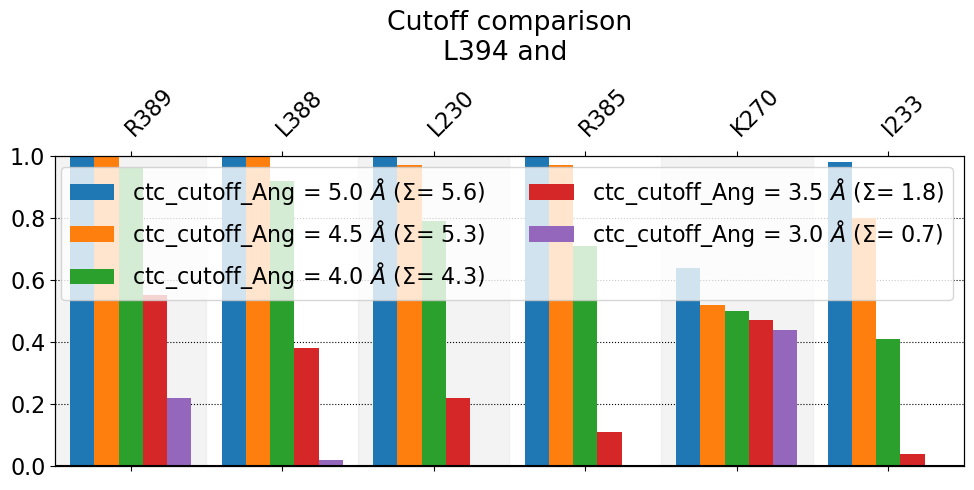

In [4]:
mdciao.cli.compare({
    "ctc_cutoff_Ang = 5.0 AA" : "neighborhood.LEU394@5.0_Ang.dat",
    "ctc_cutoff_Ang = 4.5 AA" : "neighborhood.LEU394@4.5_Ang.dat",
    "ctc_cutoff_Ang = 4.0 AA" : "neighborhood.LEU394@4.0_Ang.dat",
    "ctc_cutoff_Ang = 3.5 AA" : "neighborhood.LEU394@3.5_Ang.dat",
    "ctc_cutoff_Ang = 3.0 AA" : "neighborhood.LEU394@3.0_Ang.dat",
                   },
                   anchor="L394",
                  title="Cutoff comparison");

We observe that the smaller the cutoff, the fewer contacts get reported. In this case ``L230``, ``R385``, and ``I233`` never approach ``L394`` at distances smaller than 3.0 Angstrom during in the entire simulation, hence they don't get reported (they don't get any purple-bars).  As for ``K270``, the frequency doesn't change very much, because it's a salt-bridge that's really either formed at very close distance or broken at higher distances, as can be seen in this [time-trace figure](https://proteinformatics.uni-leipzig.de/mdciao/_images/banner.png). Also notice that, the higher the cutoff, the higher the sum over bars, $\Sigma$, since the height of the bars has increased.

## `ctc_control`
Even when using the same ``ctc_cutoff_Ang``, there's other ways of controlling what gets reported. ``ctc_control`` is one of them. This parameter controls **how many** residues get reported per neighborhood, since usually one is not interested in **all** residues but only the most frequent ones.

### Controlling with integers
One way to control this is to select only the first *n* frequent ones (*n* is an integer and is **6** by default). Here we do the comparison again, but withoug hiding the output s.t. you can see the contact list grow.

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    283 AAs    GLU30 ( 760) -   LEU340 (1042) (3) resSeq jumps
fragment 4 with      1 AAs   P0G395 (1043) -   P0G395 (1043) (4)

Will compute neighborhoods for the residues
L394
excluding 4 nearest neighbors

   residue      residx    fragment      resSeq
    LEU394         353           0         394

Performing a first pass on 1039 residue pairs to compute lower bounds on residue-residue distances via residue-COM distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 43 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



L394:
The following 4 contacts capture 3.94 (~72%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
The following files have been created:
./neighborhood.ctc_control_4.LEU394@4.5_Ang.dat
Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragme

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 43 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



L394:
The following 5 contacts capture 4.74 (~87%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
5  0.80  L394 - I233  353 - 960    0 - 3   4.74
The following files have been created:
./neighborhood.ctc_control_5.LEU394@4.5_Ang.dat
Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 43 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



L394:
The following 6 contacts capture 5.26 (~97%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
5  0.80  L394 - I233  353 - 960    0 - 3   4.74
6  0.52  L394 - K270  353 - 972    0 - 3   5.26
The following files have been created:
./neighborhood.ctc_control_6.LEU394@4.5_Ang.dat
Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 35

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 43 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



L394:
The following 7 contacts capture 5.39 (~99%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
5  0.80  L394 - I233  353 - 960    0 - 3   4.74
6  0.52  L394 - K270  353 - 972    0 - 3   5.26
7  0.13  L394 - K267  353 - 969    0 - 3   5.39
The following files have been created:
./neighborhood.ctc_control_7.LEU394@4.5_Ang.dat
Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSe

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 43 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



L394:
The following 8 contacts capture 5.41 (~100%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
5  0.80  L394 - I233  353 - 960    0 - 3   4.74
6  0.52  L394 - K270  353 - 972    0 - 3   5.26
7  0.13  L394 - K267  353 - 969    0 - 3   5.39
8  0.02  L394 - Q229  353 - 956    0 - 3   5.41
The following files have been created:
./neighborhood.ctc_control_8.LEU394@4.5_Ang.dat
These interactions are not shared:
I233, K267, K270, Q229
Their cumulative ctc freq is 5.04. 
Created files
freq_comparison.pdf
freq_comparison.xlsx


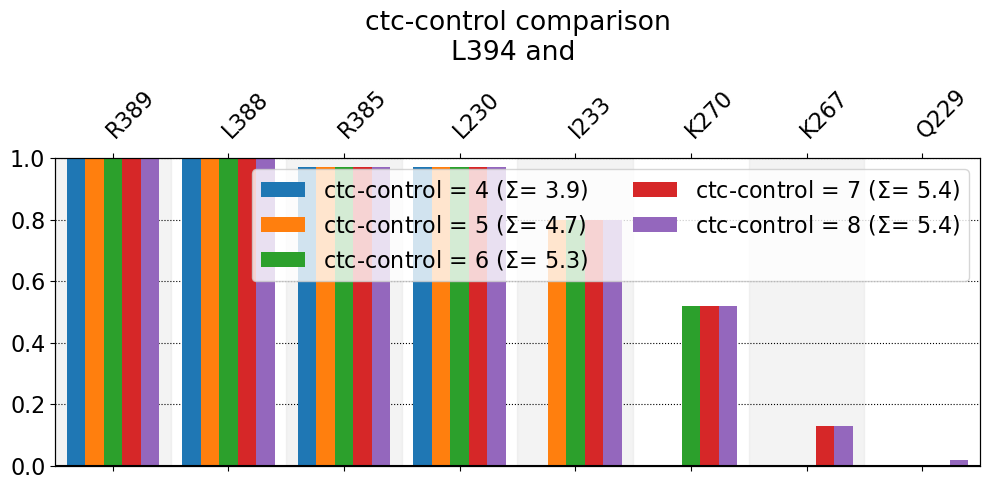

In [5]:
#%%capture
ctc_controls = [4,5,6,7,8]
for ctc_control in ctc_controls:
    mdciao.cli.residue_neighborhoods("L394",traj, 
                                     short_AA_names=True,
                                     ctc_control=ctc_control,
                                     figures=False, 
                                     fragment_names=None,
                                     no_disk=False,
                                     output_desc='neighborhood.ctc_control_%u'%ctc_control)
mdciao.cli.compare({"ctc-control = %u"%key : "neighborhood.ctc_control_%u.LEU394@4.5_Ang.dat"%(key)
                   for key in ctc_controls},
                   anchor="L394",
                   title="ctc-control comparison");

*n* is simply the number of reported bars: four blue ones, five orange ones, six green ones, seven red ones and eight purple ones. $\Sigma$ is just the sum of the heights of all bars and is thus an estimate of the **average number of neighbors** that are being reported (at this cutoff). A couple of observations:


* The relation of $\Sigma$ with *n* is straightforward: as *n* grows, so does $\Sigma$, although it grows slower with each *n* until it barely changes, given that the last bars it sums over are negligible. In other words, summing over the last purple bar (barely visible) for ``Q229`` doesn't really change $\Sigma$ much.


* Hence, for a fixed cutoff, there's an upper bond to $\Sigma$ ($\Sigma\leq\Sigma_t$), because the **total average number of neighbors**, $\Sigma_t$, of a given residue, over a given dataset, is determined by the used cutoff only. The ``ctc_control`` parameter simply determines how many neighbors get actually reported.


* Please note that for very small datasets, like one single pdb file, the word *frequency* doesn't really have a defined meaning, so that, for this cases, it is better to use ``ctc_control=1.0`` (more on this below).


* In cases where ``mdciao`` is used to look for the neighborhood of just one residue, there's a sensible number of residues to choose (somewhere between 5 and 10), because *usually* that's how many interactions a residue will have (please note, this doesn't necessary hold for elongated ligands, lipids, acid chains etc).

``mdciao`` writes out the percentage of $\Sigma_t$ captured by the reported contacts, so that the user can decide whether to increase *n* or not. For each of the iterations above, here are terminal-output reporting precisely that:

* ``ctc_control = 4``
 ```
The following 4 contacts capture 3.94 (~72%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
 ```
 The intention is to report how much of $\Sigma_t$ has been captured using 3 contacts (~72%), and how many would be needed to capture most (90%) of it (6 contacts). The actual value $\Sigma_t$ is reported immediately after (*total frequency 5.43*). You will notice that the value 5.43 doesn't change as we increase *n* in the reports below. The *9 contacts with nonzero frequency at 4.50 Angstrom* is just telling that only 9 residue-pairs were closer than distance the distance cutoff in at least %1 of the data (see the parameter `min_freq=0.01`).
 
 So, as we increase *n*, the listed contacts grows and the reported *percentage* grows, but all the rest stays the same
 
* ``ctc_control = 5``
 ```
The following 5 contacts capture 4.74 (~87%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
5  0.80  L394 - I233  353 - 960    0 - 3   4.74
 ```
 
* ``ctc_control = 6``
 ```
The following 6 contacts capture 5.26 (~97%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
5  0.80  L394 - I233  353 - 960    0 - 3   4.74
6  0.52  L394 - K270  353 - 972    0 - 3   5.26
 ```
 
* ``ctc_control = 7``
 ```
The following 7 contacts capture 5.39 (~99%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
5  0.80  L394 - I233  353 - 960    0 - 3   4.74
6  0.52  L394 - K270  353 - 972    0 - 3   5.26
7  0.13  L394 - K267  353 - 969    0 - 3   5.39
 ```

* ``ctc_control = 8``
 ```
The following 8 contacts capture 5.41 (~100%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq    label      residues  fragments   sum
1  1.00  L394 - L388  353 - 347    0 - 0   1.00
2  1.00  L394 - R389  353 - 348    0 - 0   2.00
3  0.97  L394 - L230  353 - 957    0 - 3   2.97
4  0.97  L394 - R385  353 - 344    0 - 0   3.94
5  0.80  L394 - I233  353 - 960    0 - 3   4.74
6  0.52  L394 - K270  353 - 972    0 - 3   5.26
7  0.13  L394 - K267  353 - 969    0 - 3   5.39
8  0.02  L394 - Q229  353 - 956    0 - 3   5.41
```

### Controlling with fractions
Additionally, the **upper bond** itself,  $\Sigma_t$, can be used as a reference for controlling how many contacts get reported. So, instead of specifying an absolute number (*n* = 4,5,6...), one can specify a relative number, i.e. a fraction of $\Sigma_t$ to be reported. 

This way, regardless of the actual number of involved contacts, one can choose to report **most of them**. In the example below, we choose to report 90% of the total number of average neighbors, which, as we know from above, is achieved with 6 contacts. To avoid introducing a new parameter, ``mdciao`` knows that if ``ctc_control`` is an integer (1, 2, 3...), the user means *these many contacts*, whereas if ``ctc_control`` is between 0 and 1 (.50 for 50%, .9 for 90% etc) the user wants that fraction of $\Sigma_t$:

In [6]:
mdciao.cli.residue_neighborhoods("L394",traj, 
                                 short_AA_names=True,
                                 ctc_cutoff_Ang=ctc_cutoff_Ang,
                                 ctc_control=1.0,
                                 figures=False, 
                                 fragment_names=None,
                                 no_disk=False,
                                 );

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    283 AAs    GLU30 ( 760) -   LEU340 (1042) (3) resSeq jumps
fragment 4 with      1 AAs   P0G395 (1043) -   P0G395 (1043) (4)

Will compute neighborhoods for the residues
L394
excluding 4 nearest neighbors

   residue      residx    fragment      resSeq
    LEU394         353           0         394

Performing a first pass on 1039 residue pairs to compute lower bounds on residue-residue distances via residue-COM distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 45 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



L394:
The following 9 contacts capture 6.09 (~100%) of the total frequency 6.09 (over 11 contacts with nonzero frequency at 5.00 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 6.09.
The 6-th contact has a frequency of 0.64.
   freq    label      residues  fragments   sum
1  1.00  L394 - R389  353 - 348    0 - 0   1.00
2  1.00  L394 - L388  353 - 347    0 - 0   2.00
3  1.00  L394 - L230  353 - 957    0 - 3   3.00
4  1.00  L394 - R385  353 - 344    0 - 0   3.99
5  0.98  L394 - I233  353 - 960    0 - 3   4.97
6  0.64  L394 - K270  353 - 972    0 - 3   5.60
7  0.36  L394 - K267  353 - 969    0 - 3   5.97
8  0.09  L394 - Q229  353 - 956    0 - 3   6.05
9  0.03  L394 - A226  353 - 953    0 - 3   6.09
The following files have been created:
./neighborhood.LEU394@5.0_Ang.dat


Which control-mode to choose (fraction or integers) is up to the user:

* For **compactness**, limiting the output with integers can avoid huge outputs, but might leave out some interesting stuff.

* For **completeness**, choosing ``ctc_control = 1.0`` will ensure that any-residue under the cutoff (regardless of its frequency) will be reported, but might fill the reports with "long tails" of many residues with very low frequencies (see below).

## `n_nearest`

Another way in which ``mdciao`` is choosing which contacts to show is through excluding **nearest neighbors**, i.e. residues that are predictably going to be under the cutoff simply because they are bonded neighbors of the residue in question.

In our example, for ``L394`` these would be residues 395 and 393 (first bonded) 396 and 392 (second bonded) and so on (except, in this particular ``L394`` case, since it's a terminal residue, we only get 393, 392 etc).

The default value that ``mdciao`` has for this parameter is ``n_nearest=4``, which is approximately one $\alpha$-helix turn away. The intention is to avoid reporting residues in the helix-turns immediately before and immediately after the residue.

Let's see the effect of varying this parameter:


In [7]:
%%capture
n_nearests = [0, 1, 2, 3, 4]
for n_nearest in n_nearests:
    n = mdciao.cli.residue_neighborhoods("L394",traj, 
                                     short_AA_names=True,
                                     ctc_control=20,
                                     n_nearest=n_nearest,
                                     figures=False, 
                                     no_disk=False,
                                     output_desc='neighborhood.n_nearest_%u'%n_nearest)

These interactions are not shared:
E392, L393
Their cumulative ctc freq is 3.00. 
Created files
freq_comparison.pdf
freq_comparison.xlsx


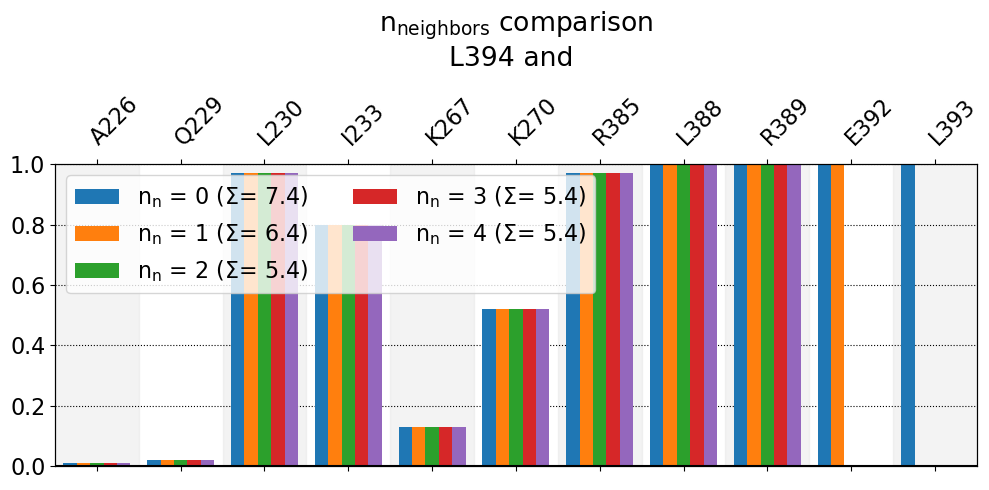

In [8]:
mdciao.cli.compare({"n_n = %u"%key : "neighborhood.n_nearest_%u.LEU394@frag0@%2.1f_Ang.dat"%(key,4.5)
                    for key in n_nearests},
                   anchor="L394",
                   sort_by="residue",
                   title="n_neighbors comparison");

* The bars:  
  Since we've sorted the frequency bars by increasing residue number, the closer to the right the bar is, the closer (in space) to ``L394`` we are. Hence, ``L394``'s immediate bonded neighbor, ``L393``, only gets a bar when ``n=0`` (no excuded neighbors, blue bar). Accordingly, next the residue after that, ``E392``, only gets a bar with ``n=0`` or ``n=1``, else it's excluded. Since ``L393`` is covalently bonded to ``L394``, and ``L392`` is covalently bonded to ``L392``, there's a strong expectation for these residue to be near each other, so these frequencies are not very informative. If you're wondering what's with positions 390 and 391, there's a bend in the C-terminus of the alpha helix 5 (``TYR391`` points away from ``L394`` throughout the simulation) so they do not appear on the report regardless.

* The legend:  
  We can see also here that, the lower ``n_neighbors``, i.e. the less neighbors we exclude, the higher the $\Sigma$ value.   So, as ``n_neighbors`` goes up, these two bars get hidden, and the graph doesn't change anymore. 

## Interfaces: `ctc_control` and `min_freq`
When computing interfaces between two different groups of residues using [mdciao.cli.interface](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html#mdciao.cli.interface), one can set `ctc_control=1.0` and `min_freq=O` to force `mdciao` to report **all** nonzero frequencies. This means any and all residue pairs that, at any given point in time, might have been at a distance >= `ctc_cutoff_Ang` (even if was just for one frame) will be reported.

After reporting the most relevant contacts, this approach typically reports also a high number of very low frequency contacts, i.e. a *long tail* of very low frequency contacts, in particular for large interfaces (more on this tail below). 

First, we take a look at the full list of contacts by using:
* `ctc_control=1.0`
* `min_freq=0`

Will compute contact frequencies for trajectories:
mdciao_example/traj.xtc
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    283 AAs    GLU30 ( 760) -   LEU340 (1042) (3) resSeq jumps
fragment 4 with      1 AAs   P0G395 (1043) -   P0G395 (1043) (4)
Select group 1: 0
Select group 2: 1

Will look for contacts in the interface between fragments
0
and
1. 

Performing a first pass on the 120360 group_1-group_2 residue pairs to compute lower bounds on residue-residue distances via residue-COM distances.


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

Reduced to only 1153 (from 120360) residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

The following 138 contacts capture 74.50 (~100%) of the total frequency 74.50 (over 138 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 73 ctcs already capture 90.0% of 74.50.
The 73-th contact has a frequency of 0.57.

     freq    label      residues  fragments   sum 
1    1.00  I26  - K89    22 - 442    0 - 1    1.00
2    1.00  R228 - G162  194 - 515    0 - 1    2.00
3    1.00  R228 - D186  194 - 539    0 - 1    3.00
4    1.00  Q227 - Y145  193 - 498    0 - 1    4.00
5    1.00  Y37  - L55    33 - 408    0 - 1    5.00
6    1.00  K233 - N230  199 - 583    0 - 1    6.00
7    1.00  K233 - D246  199 - 599    0 - 1    7.00
8    1.00  D33  - K78    29 - 431    0 - 1    8.00
9    1.00  F238 - L117  204 - 470    0 - 1    9.00
10   1.00  F238 - W99   204 - 452    0 - 1   10.00
11   1.00  Q227 - N119  193 - 472    0 - 1   11.00
12   1.00  L30  - G53    26 - 406    0 - 1   12.00
13   1.00  R201 - R96   169 - 449    0 - 1   13.00
14   1.00  N23  - N88    19 - 4

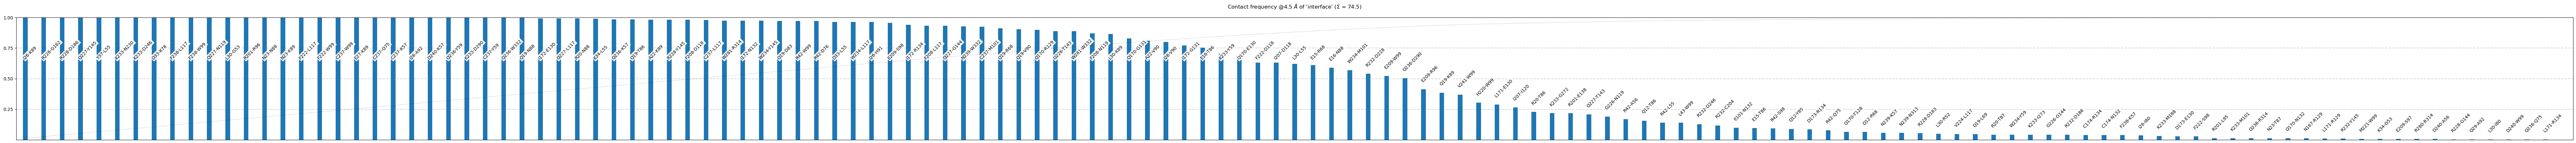

In [9]:
intf = mdciao.cli.interface("mdciao_example/traj.xtc", topology="mdciao_example/top.pdb", 
                            no_disk=True, interface_selection_1=[0], interface_selection_2=[1], 
                            ctc_control=1.0, 
                            min_freq=0,
                            figures=False);
intf.plot_freqs_as_bars(4.5, shorten_AAs=True, defrag="@", cumsum=True);

In the graph (double click to enlarge), we note the *long tail* of the bar-plot as we move to the right. *Where exactly* should one stop to pay attention can't be really answered numercally alone. `mdciao` tries to provide hints as to what might be sane values, e.g, the log reports:
```
    The following 138 contacts capture 74.50 (~100%) of the total frequency 74.50 (over 138 contacts with nonzero frequency at 4.50 Angstrom).
    As orientation value, the first 73 ctcs already capture 90.0% of 74.50.
    The 73-th contact has a frequency of 0.57
 ```
which means:
1. the reported contacts, which have resulted from using `ctc_control=1.0, min_freq=0.0`, are capturing **100%** of anything there is to report.   
   This is exactly what is expected (100% of 100%).
2. Then, as orientation, `mdciao` looks for how many contacts one would need to capture 90% of that 100%, and the in this case the number is 73.  
   Meaning, just 73 contacts out of 137 contacts (i.e. roughly the upper half of the table) already capture 90% of everything there is to report. You could *throw away* the second half of the entries of the contact list and **still** keep 90% of the total frequency there is to report. The *running* value of $\Sigma$ as you move to the right on the plot is represented with fainted gray line that grows between 0 and 1. You can see that in the middle of the plot it already reaches high values. 
3. Finally, `mdciao` informs the user of the frequency value of that last contact at 90%. In this case, that value (0.57 i.e.  57%) is, in this case, too high to be discarded.   
   While truncating the list at 90% seems a reasonable way to focus on the relevant frequencies, that would mean discarding some contacts that are formed slightly below 50% of the time (see the graph).

Hence, as a compromise between reporting *everything* or risking truncating *too early*, `mdciao` sets by default `min_freq=0.10`, i.e. contacts formed less than 10% of the time are simply not included in the returned `ContactGroup`. The *long tail* is contained in the above report, nevertheless:

Will compute contact frequencies for trajectories:
mdciao_example/traj.xtc
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    283 AAs    GLU30 ( 760) -   LEU340 (1042) (3) resSeq jumps
fragment 4 with      1 AAs   P0G395 (1043) -   P0G395 (1043) (4)
Select group 1: 0
Select group 2: 1

Will look for contacts in the interface between fragments
0
and
1. 

Performing a first pass on the 120360 group_1-group_2 residue pairs to compute lower bounds on residue-residue distances via residue-COM distances.


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

Reduced to only 1153 (from 120360) residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

The following 93 contacts capture 72.90 (~98%) of the total frequency 74.50 (over 138 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 73 ctcs already capture 90.0% of 74.50.
The 73-th contact has a frequency of 0.57.

    freq    label      residues  fragments   sum 
1   1.00  I26  - K89    22 - 442    0 - 1    1.00
2   1.00  R228 - G162  194 - 515    0 - 1    2.00
3   1.00  R228 - D186  194 - 539    0 - 1    3.00
4   1.00  Q227 - Y145  193 - 498    0 - 1    4.00
5   1.00  Y37  - L55    33 - 408    0 - 1    5.00
6   1.00  K233 - N230  199 - 583    0 - 1    6.00
7   1.00  K233 - D246  199 - 599    0 - 1    7.00
8   1.00  D33  - K78    29 - 431    0 - 1    8.00
9   1.00  F238 - L117  204 - 470    0 - 1    9.00
10  1.00  F238 - W99   204 - 452    0 - 1   10.00
11  1.00  Q227 - N119  193 - 472    0 - 1   11.00
12  1.00  L30  - G53    26 - 406    0 - 1   12.00
13  1.00  R201 - R96   169 - 449    0 - 1   13.00
14  1.00  N23  - N88    19 - 441    0 - 1   14.

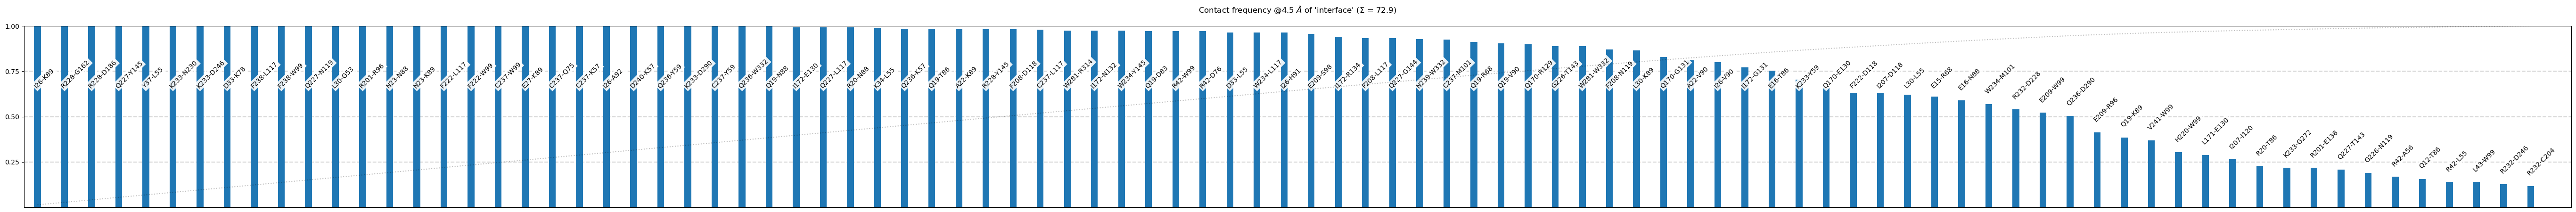

In [10]:
intf = mdciao.cli.interface("mdciao_example/traj.xtc", topology="mdciao_example/top.pdb", 
                            no_disk=True, interface_selection_1=[0], interface_selection_2=[1], 
                            ctc_control=1.0, 
                            figures=False);
intf.plot_freqs_as_bars(4.5, shorten_AAs=True, defrag="@", cumsum=True);

The output
```
The following 93 contacts capture 72.90 (~98%) of the total frequency 74.50 (over 138 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 73 ctcs already capture 90.0% of 74.50.
The 73-th contact has a frequency of 0.57
```
let's us know that ignoring frequencies < .1 reduces the full list from 138 to 93 entries while keeping ca 98% of $\Sigma_t$. In this case, even if we have `ctc_control=1.0` we don't get 100% of the freqs reported (only 98%) because the `min_freq=0.1` (default value) is causing the loss of %2 of contacts all of which have frequencies below 10%.

## Interfaces: `self_interface`

From the docs of [mdciao.cli.interface](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html#mdciao.cli.interface):
    
    Note
    ----
    If your definitions of `interface_selection_1` and
    `interface_selection_2` lead to some overlap between
    the interface members (see below), mdciao's default
    is to ignore contact pairs within the same fragment.
    E.g., in the context of a GPCR, computing
    "TM3" vs "TM*" ("TM3" vs "all TMs") won't include
    TM3-TM3 contacts by default. To include these
    (or equivalent) contacts set `self_interface` = True.

    Another example could be computing the interface of
    C-terminus of a receptor with the entire receptor,
    where it might be useful to include the contacts of
    the C-terminus with itself.

    When using `self_interface` = True, it's advisable to
    increase `n_nearest`, since otherwise neighboring
    residues of the shared set (the TM3-TM3 or the Cterm-Cterm)
    will always appear as formed.


We can compute the self contacts of the $\alpha$5-helix of the G-protein. Whereas most of the helix is straight, the C-terminal bends a bit backwards and interacts with itself:

Will compute contact frequencies for trajectories:
mdciao_example/traj.xtc
 with a stride of 1 frames
Using method 'resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    284 AAs    GLU30 ( 760) -   P0G395 (1043) (3) resSeq jumps
No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!
Please cite the following reference to the GPCRdb:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
For more information, call mdciao.nomenclature.references()
The GPCR-labels align best with fragments: [3] (first-last: GLU30-P0G395).

Mapping the GPCR fragments onto your topology:
 TM1  with     32 AAs    GLU3

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

Reduced to only 95 (from 231) residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

The following 4 contacts capture 3.97 (~100%) of the total frequency 3.99 (over 7 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 4 ctcs already capture 90.0% of 3.99.
The 4-th contact has a frequency of 0.97.

   freq            label              residues  fragments   sum
1  1.00  R389@G.H5.21 - L394@G.H5.26  348 - 353    0 - 0   1.00
2  1.00  L388@G.H5.20 - L394@G.H5.26  347 - 353    0 - 0   2.00
3  1.00  L388@G.H5.20 - L393@G.H5.25  347 - 352    0 - 0   3.00
4  0.97  R385@G.H5.17 - L394@G.H5.26  344 - 353    0 - 0   3.97

          label  freq
1  L394@G.H5.26  2.97
2  L388@G.H5.20  2.00
3  R389@G.H5.21  1.00
4  L393@G.H5.25  1.00
5  R385@G.H5.17  0.97



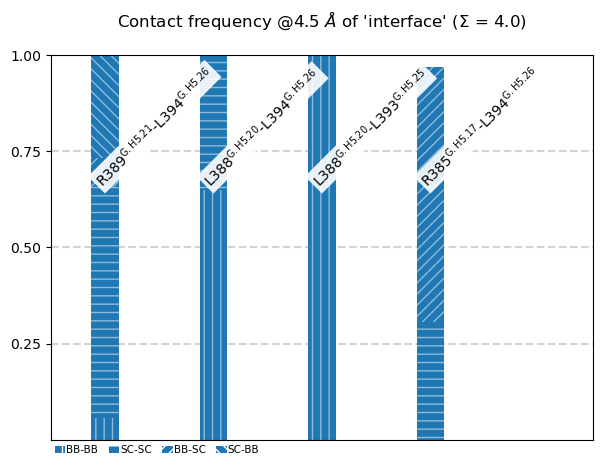

In [11]:
intf = mdciao.cli.interface("mdciao_example/traj.xtc", topology="mdciao_example/top.pdb",
                            fragments="consensus",accept_guess=True,
                            no_disk=True, interface_selection_1="G.H5", interface_selection_2="G.H5", 
                            ctc_control=1.0, 
                            GPCR_UniProt="adrb2_human",CGN_UniProt="gnas2_human",
                            self_interface=True,
                            #min_freq=0,
                            n_nearest=4,
                            figures=False)
intf.plot_freqs_as_bars(4.5, shorten_AAs=True, plot_atomtypes=True);

These are the contacts associated with the C-terminus of $\alpha$5 bending back and interacting with itself:
```
   freq            label              residues  fragments   sum
1  1.00  R389@G.H5.21 - L394@G.H5.26  348 - 353    0 - 0   1.00
2  1.00  L388@G.H5.20 - L394@G.H5.26  347 - 353    0 - 0   2.00
3  1.00  L388@G.H5.20 - L393@G.H5.25  347 - 352    0 - 0   3.00
4  0.97  R385@G.H5.17 - L394@G.H5.26  344 - 353    0 - 0   3.97
```
We have also ploted them also as bars, including the atom-types. 

## Interfaces: `AA_selection`
If the `fragments` themselves are still too broad a definition, one can select a sub-set of aminoacids of those fragments via `AA_selection`:

From the [docs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html)
```
    AA_selection : str or list, default is None
        Whatever the fragment definition and fragment selection
        has been, one can further refine the list of
        potential residue pairs by making a selection at
        the level of single aminoacids (AAs).
        E.g., if (like above) one has selected the interface
        to be "TM3" vs "TM2",

        >>> interface_selection_1="TM3"
        >>> interface_selection_2="TM2"

        but wants to select only some regions of those helices,
        one can pass here an `AA_selection`.
```
Please read the rest of the docs, since the parameter has more options than the ones we're about to use.

Here, we define the interface as contacts of the $\alpha$5-helix of the G-protein with the TM-bundle, using  

```no_disk=True, interface_selection_1="G.H5", interface_selection_2="TM*"```

and then use 

```AA_selection="390-394"``` 

to select the C-terminal  *tip* of $\alpha$5. You can look the $\alpha$5 definition from the output a couple of cells above   
```G.H5 with     26 AAs   THR369@G.H5.01   ( 328) -   LEU394@G.H5.26   (353 ) (G.H5) ```

Will compute contact frequencies for trajectories:
mdciao_example/traj.xtc
 with a stride of 1 frames
Using method 'resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    284 AAs    GLU30 ( 760) -   P0G395 (1043) (3) resSeq jumps
No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!
Please cite the following reference to the GPCRdb:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
For more information, call mdciao.nomenclature.references()
The GPCR-labels align best with fragments: [3] (first-last: GLU30-P0G395).

Mapping the GPCR fragments onto your topology:
 TM1  with     32 AAs    GLU3

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

Reduced to only 165 (from 1145) residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

The following 18 contacts capture 13.40 (~98%) of the total frequency 13.64 (over 25 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 14 ctcs already capture 90.0% of 13.64.
The 14-th contact has a frequency of 0.52.

    freq            label              residues  fragments   sum 
1   1.00  E392@G.H5.24 - T274@6.36x36  351 - 976    0 - 3    1.00
2   1.00  L393@G.H5.25 - L275@6.37x37  352 - 977    0 - 3    2.00
3   0.99  L393@G.H5.25 - V222@5.61x61  352 - 949    0 - 3    2.99
4   0.99  L393@G.H5.25 - A271@6.33x33  352 - 973    0 - 3    3.98
5   0.99  Y391@G.H5.23 - R131@3.50x50  350 - 861    0 - 3    4.97
6   0.97  L394@G.H5.26 - L230@5.69x69  353 - 957    0 - 3    5.94
7   0.96  Y391@G.H5.23 - T274@6.36x36  350 - 976    0 - 3    6.90
8   0.96  Y391@G.H5.23 - I135@3.54x54  350 - 865    0 - 3    7.86
9   0.94  L393@G.H5.25 - T274@6.36x36  352 - 976    0 - 3    8.80
10  0.82  E392@G.H5.24 - K270@6.32x32  351 - 972    0 - 3    9.62
11  0.80  L394@G.H5.26

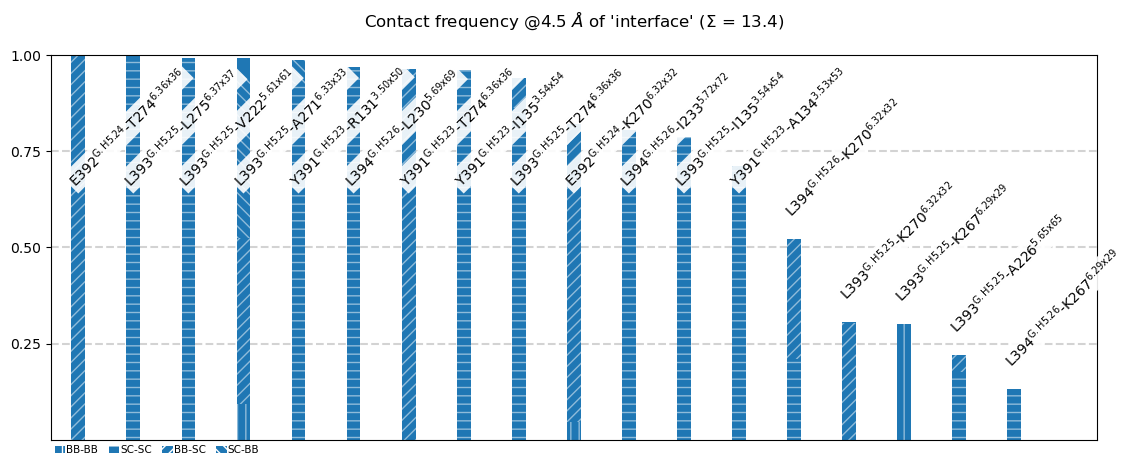

In [12]:
intf = mdciao.cli.interface("mdciao_example/traj.xtc", topology="mdciao_example/top.pdb",
                            fragments="consensus",accept_guess=True,
                            no_disk=True, interface_selection_1="G.H5", interface_selection_2="TM*", 
                            ctc_control=1.0, 
                            GPCR_UniProt="adrb2_human",CGN_UniProt="gnas2_human",
                            n_nearest=4,
                            AA_selection="390-394",
                            figures=False)
intf.plot_freqs_as_bars(4.5, shorten_AAs=True, plot_atomtypes=True);

## Finally
Some of these parameters/criteria appear in other places in ``mdciao``, not only at the moment of computing the distances, but also at the moment of showing them. E.g., the method [mdciao.flare.freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html) automatically hides neighboring contacts via the ``exclude_neighbors = 1`` parameter.

So, if at any moment you miss some contact in the reports (graphical or otherwise), check if some of the parameters above are at play.